In [2]:
import json
prettyprint = lambda x: json.dumps(x, indent=4, sort_keys=True)

In [3]:
with open('all_plans_with_wires.json', 'r') as f:
    aq_plans_json = json.load(f)

In [4]:
print(len(aq_plans_json)) #9616
print(prettyprint(aq_plans_json[3]))

9616
{
    "created_at": "2017-07-13T09:01:17.000-07:00",
    "id": 15,
    "operations": [
        {
            "created_at": "2017-07-13T09:01:17.000-07:00",
            "field_values": [
                {
                    "rid": 19675,
                    "role": "input",
                    "sample": {
                        "rid": 19679,
                        "sample_type_id": 2
                    },
                    "sample_type": 2
                },
                {
                    "rid": 19676,
                    "role": "output",
                    "sample": {
                        "rid": 19681,
                        "sample_type_id": 2
                    },
                    "sample_type": 2
                },
                {
                    "rid": 19677,
                    "role": "output",
                    "sample": {
                        "rid": 19683,
                        "sample_type_id": 2
                    },
                 

In [20]:
from pandas.io.json import json_normalize
operations_df = json_normalize(aq_plans_json, 
                       record_path=['operations', 'field_values'], 
                       meta=['id', 'created_at', 'updated_at', 'status', 'user_id',
                            ['op', 'id'], ['op', 'operation_type_id'], ['op', 'created_at'], ['op', 'updated_at'], ['op', 'status'], ['op', 'operation_type']],
                       record_prefix='fv.')

In [21]:
operations_df = operations_df.drop(columns=['fv.sample', 'fv.rid']) # drop irrelevant columns
operations_df = operations_df.rename(index=str, columns={"op.operation_type": "op.category"}) #rename for clarity
print(operations_df['id'].nunique())
operations_df.head(5)

8819


,fv.role,fv.sample_type,id,created_at,updated_at,status,user_id,op.id,op.operation_type_id,op.created_at,op.updated_at,op.status,op.category
0,output,2.0,9,2017-07-13T08:29:06.000-07:00,2018-07-27T08:39:35.000-07:00,None,66,17,48,2017-07-13T08:29:06.000-07:00,2017-07-13T08:50:43.000-07:00,done,Cloning
1,output,2.0,10,2017-07-13T08:29:06.000-07:00,2018-07-27T08:39:35.000-07:00,None,66,18,48,2017-07-13T08:29:06.000-07:00,2017-07-13T08:50:43.000-07:00,done,Cloning
2,input,2.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,27,20,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning
3,output,2.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,27,20,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning
4,output,2.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,27,20,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning


In [22]:
'''filter operations'''
# filter out plans with a status value because they are templates/planning
operations_real = operations_df.loc[operations_df['status'].isnull()]
operations_real = operations_real.drop_duplicates('op.id') #drop duplicate op ids

In [23]:
print(len(operations_real))#~88,000 operations
print(operations_real['id'].nunique()) #~7,500 plans
operations_real.head(5)

87996
7574


,fv.role,fv.sample_type,id,created_at,updated_at,status,user_id,op.id,op.operation_type_id,op.created_at,op.updated_at,op.status,op.category
0,output,2.0,9,2017-07-13T08:29:06.000-07:00,2018-07-27T08:39:35.000-07:00,None,66,17,48,2017-07-13T08:29:06.000-07:00,2017-07-13T08:50:43.000-07:00,done,Cloning
1,output,2.0,10,2017-07-13T08:29:06.000-07:00,2018-07-27T08:39:35.000-07:00,None,66,18,48,2017-07-13T08:29:06.000-07:00,2017-07-13T08:50:43.000-07:00,done,Cloning
2,input,2.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,27,20,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning
5,input,2.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,28,19,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning
7,input,2.0,13,2017-07-13T08:58:15.000-07:00,2017-07-13T08:58:16.000-07:00,None,17,29,18,2017-07-13T08:58:15.000-07:00,2017-07-13T09:17:41.000-07:00,error,Cloning


In [18]:
print(operations_real['op.operation_type_id'].nunique())

313


In [19]:
operations_real.groupby("fv.role")['fv.sample_type'].nunique()

fv.role
input     23
output    15
Name: fv.sample_type, dtype: int64

In [24]:
# all possible operation categories
op_categories = operations_real['op.category'].unique()
print(op_categories) 
print(len(op_categories)) #31 categories

['Cloning' 'Yeast Trash' 'Manager' 'Misc.' 'Cloning Sandbox'
 'Tissue Culture Lentivirus' 'Tissue Culture' 'Reagents'
 'Agrobacterium work' 'OBSOLETE' 'Hydra Transgenics' 'Hydra Husbandry'
 'Plant Work' 'Flow Cytometry' 'Induction - High Throughput'
 'Next Gen Prep' 'Yeast Display' 'Yeast' 'YG_Harmonization'
 'Library Cloning' 'RNA' 'Illumina NGS' 'Unsorted' 'OLASimple'
 'Preparative qPCR' 'Plate Reader' 'Control Blocks' 'SynAg'
 'Protein Purification' 'qPCR' 'High Throughput Culturing']
31


In [ ]:
'''make cartesian product and index of all possible edges'''
from itertools import product
cartesian_edges = list(product(op_categories, op_categories))
cartesian_indices_dict = dict(zip(cartesian_edges, range(1,len(cartesian_edges))))
cartesian_indices_dict

In [26]:
'''create a wires dataframe'''
from pandas.io.json import json_normalize
wires_df = json_normalize(aq_plans_json, record_path=['wires'])
wires_df = wires_df.drop(columns=['id', 'rid']) # drop irrelevant columns
wires_df = wires_df.rename(index=str, columns={"from": "src_op_id", "to": "dest_op_id"}) #rename for clarity
wires_df.head(5)

,src_op_id,sample,dest_op_id
0,28.0,20269: pHyVecMod-hom-pKS1-innexin2,27.0
1,29.0,20269: pHyVecMod-hom-pKS1-innexin2,28.0
2,28.0,20269: pHyVecMod-hom-pKS1-innexin2,27.0
3,30.0,20269: pHyVecMod-hom-pKS1-innexin2,29.0
4,29.0,20269: pHyVecMod-hom-pKS1-innexin2,28.0


In [28]:
import numpy as np
'''format the wires dataframe to get rid of undefined values'''
to_from_pairs_df = wires_df.drop_duplicates(subset=['src_op_id', 'dest_op_id']) #89459
to_from_pairs_df = to_from_pairs_df[~to_from_pairs_df.isin([np.nan, np.inf, -np.inf]).any(1)]
# fill in NaNs and cast from float to int
# to_from_pairs_df = to_from_pairs_df.fillna(value={'src_op_id': 0, 'dest_op_id': 0}) 
to_from_pairs_df = to_from_pairs_df.astype({"src_op_id": int, "dest_op_id": int})
# len(to_from_pairs)

In [29]:
'''left merge with destination to find op type'''
merged_to = wires_df.merge(operations_real, left_on='dest_op_id', right_on='op.id', how='left')
merged_pairs_df = merged_to[['src_op_id', 'dest_op_id', 'op.category']].drop_duplicates().reset_index()
merged_pairs_df = merged_pairs_df.rename(index=str, columns={"op.category": "dest_op_category"}) #rename for clarity
merged_pairs_df.head(5)

,index,src_op_id,dest_op_id,dest_op_category
0,0,28.0,27.0,Cloning
1,1,29.0,28.0,Cloning
2,3,30.0,29.0,Cloning
3,5,31.0,30.0,Cloning
4,7,32.0,31.0,Cloning


In [30]:
'''left merge with source to find op type'''
edge_pairs_df = merged_pairs_df.merge(operations_real, left_on='src_op_id', right_on='op.id', how='left')
edge_pairs_df = edge_pairs_df[['src_op_id', 'dest_op_id', 'op.category', 'dest_op_category', 'id']].reset_index()
edge_pairs_df = edge_pairs_df.rename(index=str, columns={"op.category": "src_op_category", 'id': 'plan_id'}) #rename for clarity
edge_pairs_df.head(5)

,index,src_op_id,dest_op_id,src_op_category,dest_op_category,plan_id
0,0,28.0,27.0,Cloning,Cloning,13.0
1,1,29.0,28.0,Cloning,Cloning,13.0
2,2,30.0,29.0,Cloning,Cloning,13.0
3,3,31.0,30.0,Cloning,Cloning,13.0
4,4,32.0,31.0,Cloning,Cloning,13.0


In [31]:
edge_pairs_df = edge_pairs_df.dropna()
edge_pairs_df['category_pairs'] = list(zip(edge_pairs_df['src_op_category'], edge_pairs_df['dest_op_category']))
count_edges = edge_pairs_df.groupby(['plan_id', 'category_pairs']).size().unstack(fill_value=0)#to_frame('size')
count_edges.head(5)

category_pairs,"(Agrobacterium work, Agrobacterium work)","(Cloning, Cloning)","(Cloning, Cloning Sandbox)","(Cloning, Control Blocks)","(Cloning, Induction - High Throughput)","(Cloning, Library Cloning)","(Cloning, Next Gen Prep)","(Cloning, OBSOLETE)","(Cloning, Preparative qPCR)","(Cloning, Protein Purification)",...,"(Yeast, YG_Harmonization)","(Yeast, Yeast)","(Yeast Display, Flow Cytometry)","(Yeast Display, Library Cloning)","(Yeast Display, Next Gen Prep)","(Yeast Display, Yeast Display)","(Yeast Trash, Cloning)","(Yeast Trash, OBSOLETE)","(Yeast Trash, Yeast Trash)","(qPCR, qPCR)"
plan_id,,,,,,,,,,,,,,,,,,,,,
13.0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17.0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
import pandas as pd
# create dummies for plans with no edges
diff = list(set(cartesian_edges) - set(edge_pairs_df['category_pairs'].unique()))

all_plan_ids = operations_real['id'].drop_duplicates().values #numpy array
dummy_edges_df = pd.DataFrame(0, index=np.arange(len(all_plan_ids)), columns=diff)
dummy_edges_df.insert(0, 'plan_id', all_plan_ids)

In [34]:
# merge count and dummies
all_edge_counts = count_edges.merge(dummy_edges_df, on='plan_id', how='right')
all_edge_counts = all_edge_counts.fillna(0)

In [45]:
all_edge_counts.head(5)

,plan_id,"(Agrobacterium work, Agrobacterium work)","(Cloning, Cloning)","(Cloning, Cloning Sandbox)","(Cloning, Control Blocks)","(Cloning, Induction - High Throughput)","(Cloning, Library Cloning)","(Cloning, Next Gen Prep)","(Cloning, OBSOLETE)","(Cloning, Preparative qPCR)",...,"(Illumina NGS, Yeast Trash)","(OLASimple, Control Blocks)","(OLASimple, Protein Purification)","(qPCR, OLASimple)","(OBSOLETE, Plate Reader)","(Next Gen Prep, Induction - High Throughput)","(Hydra Husbandry, Protein Purification)","(High Throughput Culturing, Protein Purification)","(Hydra Transgenics, Reagents)","(Unsorted, Cloning Sandbox)"
0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,17.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,18.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
'''merge with dates and user id'''
dates_user_df = operations_real[['id', 'created_at', 'user_id']]
dates_user_df = dates_user_df.drop_duplicates('id')

complete_df = all_edge_counts.merge(dates_user_df, left_on='plan_id', right_on='id', how='inner')
complete_df = complete_df.drop(columns=['id'])
complete_df.head(5)

,plan_id,"(Agrobacterium work, Agrobacterium work)","(Cloning, Cloning)","(Cloning, Cloning Sandbox)","(Cloning, Control Blocks)","(Cloning, Induction - High Throughput)","(Cloning, Library Cloning)","(Cloning, Next Gen Prep)","(Cloning, OBSOLETE)","(Cloning, Preparative qPCR)",...,"(OLASimple, Protein Purification)","(qPCR, OLASimple)","(OBSOLETE, Plate Reader)","(Next Gen Prep, Induction - High Throughput)","(Hydra Husbandry, Protein Purification)","(High Throughput Culturing, Protein Purification)","(Hydra Transgenics, Reagents)","(Unsorted, Cloning Sandbox)",created_at,user_id
0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2017-07-13T08:58:15.000-07:00,17
1,15.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2017-07-13T09:01:17.000-07:00,17
2,17.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2017-07-13T09:02:00.000-07:00,17
3,18.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2017-07-13T09:02:14.000-07:00,17
4,20.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2017-07-13T09:03:03.000-07:00,17


In [56]:
'''Convert timestamps'''
import time
def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.timetuple())

complete_df['created_at'] = pd.to_datetime(complete_df['created_at'], utc=True).dt.date
complete_df['created_at'] = complete_df['created_at'].apply(convert_to_timestamp)
complete_df.head(5)

,plan_id,"(Agrobacterium work, Agrobacterium work)","(Cloning, Cloning)","(Cloning, Cloning Sandbox)","(Cloning, Control Blocks)","(Cloning, Induction - High Throughput)","(Cloning, Library Cloning)","(Cloning, Next Gen Prep)","(Cloning, OBSOLETE)","(Cloning, Preparative qPCR)",...,"(OLASimple, Protein Purification)","(qPCR, OLASimple)","(OBSOLETE, Plate Reader)","(Next Gen Prep, Induction - High Throughput)","(Hydra Husbandry, Protein Purification)","(High Throughput Culturing, Protein Purification)","(Hydra Transgenics, Reagents)","(Unsorted, Cloning Sandbox)",created_at,user_id
0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.499918e+09,17
1,15.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.499918e+09,17
2,17.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.499918e+09,17
3,18.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.499918e+09,17
4,20.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.499918e+09,17


In [57]:
'''normalize edge and dates'''
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))

normalized_df = complete_df.sort_values(by=['plan_id'])
for column in normalized_df.loc[:, normalized_df.columns.difference(['plan_id', 'user_id'])]:
    normalized_df[column] = min_max_scaler.fit_transform(normalized_df[column].values.reshape(-1,1))
normalized_df.head(10)

,plan_id,"(Agrobacterium work, Agrobacterium work)","(Cloning, Cloning)","(Cloning, Cloning Sandbox)","(Cloning, Control Blocks)","(Cloning, Induction - High Throughput)","(Cloning, Library Cloning)","(Cloning, Next Gen Prep)","(Cloning, OBSOLETE)","(Cloning, Preparative qPCR)",...,"(OLASimple, Protein Purification)","(qPCR, OLASimple)","(OBSOLETE, Plate Reader)","(Next Gen Prep, Induction - High Throughput)","(Hydra Husbandry, Protein Purification)","(High Throughput Culturing, Protein Purification)","(Hydra Transgenics, Reagents)","(Unsorted, Cloning Sandbox)",created_at,user_id
5894,9.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66
5895,10.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66
0,13.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
1,15.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
2,17.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
3,18.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
4,20.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
5,27.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
6,29.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
7,31.0,0.0,1.347709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17


In [ ]:
user_85_plans = normalized_df.query("user_id == 85")
user_85_plans

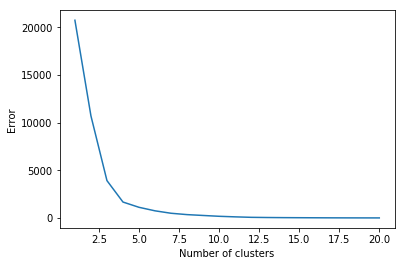

In [52]:
#elbow method to determine K on raw normalized data (on user 85)
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure()

def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

evaluate_clusters(user_85_plans.iloc[:,2:33],20)
plt.show()

In [60]:
import sklearn.metrics as metrics
euclidean_dists = metrics.euclidean_distances(complete_df.iloc[:,1:963])
len(euclidean_dists[0])

7574

1251


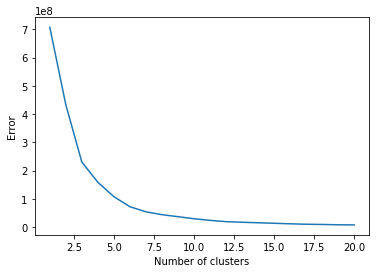

In [61]:
#elbow method to determine K on euclidean distance data (user 85)
import numpy as np
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

user_85_euclidean_dists = metrics.euclidean_distances(user_85_plans.iloc[:,2:963])
print(len(user_85_euclidean_dists))

evaluate_clusters(user_85_euclidean_dists,20)
plt.show()

In [ ]:
# '''turn operations with more than one edge into an array'''
# merged_pairs_df = merged_pairs_df.groupby('from')['op.operation_type_id'].apply(list).reset_index()
# '''left merge on operation ids to preserve plans with no edges'''
# merged_from = operations_real.merge(merged_pairs_df, left_on='op.id', right_on='source_op_id', how='left')
# merged_from = merged_from.drop(columns=['source_op_id', 'fv.sample'])
# fill NaN values with array of 0
# for row in merged_from.loc[merged_from['destination_op_type_ids'].isnull(), 'destination_op_type_ids'].index:
#     merged_from.at[row, 'destination_op_type_ids'] = [0]
# merged_from.head(5)